In [1]:
import requests
import time

import pandas         as pd
import numpy          as np
import plotly.express as px
import seaborn        as sns

from bs4            import BeautifulSoup
from urllib.request import Request, urlopen, urlretrieve
from urllib.error   import URLError, HTTPError

In [35]:
cards = []

pag = 2

for i in range(pag):

  url = 'https://www.zapimoveis.com.br/venda/apartamentos/rj+rio-de-janeiro+zona-norte+meier/?__ab=olx:upgrade,zap-newldp:control,super-high:new,exp-aa-test:B,c-type:vrcard,novopos:new,rp-imob:enabled&transacao=venda&onde=,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Norte,M%C3%A9ier,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Norte%3EMeier,-22.902083,-43.280379,&tipos=apartamento_residencial&pagina='+str(i + 1)
  headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'}

  requisicao = Request(url, headers = headers)

  try:
      response = urlopen(requisicao)
      html = response.read().decode('utf-8')
      soup = BeautifulSoup(html, 'html.parser')
  except HTTPError as e:
      print(e.status(), e.reason())
  except URLError as e:
      print(e.reason())

  anuncios = soup.find('div', attrs = {'class':'listing-wrapper'}).findAll('div', attrs = {'class':'l-card__content'})

  for anuncio in anuncios:

    card = {}

    #valor
    valor = anuncio.find('p', attrs = {'class':'l-text l-u-color-neutral-28 l-text--variant-heading-small l-text--weight-bold undefined'})

    if valor == None:
      card['Valor'] = int('0')
    else:
      card['Valor'] = valor.get_text().replace('R$', '').replace('.','')

    #metragem
    metragem = anuncio.find('p', attrs = {'itemprop':'floorSize'})

    if metragem == None:
      card['Metragem(m²)'] = int('0')
    else:
      card['Metragem(m²)'] = metragem.get_text().replace(' m²','')

    #quartos
    quarto = anuncio.find('p', attrs = {'itemprop':'numberOfRooms'})

    if quarto == None:
      card['quartos'] = int('1')
    else:
      card['quartos'] = quarto.get_text()

    #banheiro
    banheiro = anuncio.find('p', attrs = {'itemprop':'numberOfBathroomsTotal'})

    if banheiro == None:
      card['banheiros'] = int('1')
    else:
      card['banheiros'] = banheiro.get_text()

    #garagem
    garagem = anuncio.find('p', attrs = {'itemprop':'numberOfParkingSpaces'})

    if garagem == None:
      card['garagem'] = int('0')
    else:
      card['garagem'] = garagem.get_text()

    #endereços
    endereco = anuncio.find('span', attrs = {'class':'l-text l-u-color-neutral-28 l-text--variant-body-regular l-text--weight-regular card__header-address'})

    if endereco == None:
      card['Endereço'] = None
    else:
      card['Endereço'] = endereco.get_text()

    #Preço condomínio
    condominio = anuncio.find('p', attrs = {'class':'l-text l-u-color-neutral-44 l-text--variant-body-small l-text--weight-regular undefined'})

    if condominio == None:
      card['Condominio'] = 0
    else:
      card['Condominio'] = condominio.get_text()

    #IPTU
    iptu = anuncio.find('p', attrs = {'class':'l-text l-u-color-neutral-44 l-text--variant-body-small l-text--weight-regular undefined'})

    if iptu == None:
      card['IPTU'] = 0
    else:
      card['IPTU'] = iptu.get_text()

    cards.append(card)

df = pd.DataFrame(cards)
df

,Valor,Metragem(m²),quartos,banheiros,garagem,Endereço,Condominio,IPTU
0,621100,76 - 161,3,2 - 3,1 - 2,"Rua Padre Ildefonso Penalba, 388 - Méier, Rio ...",0,0
1,639147,65 - 81,2 - 3,2 - 3,1 - 2,"Rua Tenente Costa, 187 - Méier, Rio de Janeiro...",0,0
2,401291,49 - 68,2 - 3,2,1,"Rua José Bonifácio, 140 - Todos os Santos, Rio...",0,0
3,0,117,3,3,2,"Rua Tenente Costa, 91 - Méier, Rio de Janeiro ...",Cond. R$ 550 | IPTU R$ 1.734,Cond. R$ 550 | IPTU R$ 1.734
4,260000,65,2,2,1,"Rua Aquidabã, Méier, Rio de Janeiro - RJ",Cond. R$ 758 | IPTU R$ 1,Cond. R$ 758 | IPTU R$ 1
5,0,70,2,1,0,"Rua Amaragi, 1 - Méier, Rio de Janeiro - RJ",Cond. R$ 350 | IPTU R$ 60,Cond. R$ 350 | IPTU R$ 60
6,330000,65,2,2 - 4,1,"Rua Venceslau, Méier, Rio de Janeiro - RJ",Encontramos 2 anúncios deste imóvel,Encontramos 2 anúncios deste imóvel
7,230000,75,2,2,1,"Rua Aquidabã, 842 - Méier, Rio de Janeiro - RJ",0,0
8,280000,62,2,2,1,"Méier, Rio de Janeiro - RJ",Cond. R$ 640 | IPTU R$ 0,Cond. R$ 640 | IPTU R$ 0
9,279000,84,2,2,1,"Rua Salvador Pires, Méier, Rio de Janeiro - RJ",Cond. R$ 320 | IPTU R$ 614,Cond. R$ 320 | IPTU R$ 614


In [ ]:
df1 = df.copy()

#Tratamento de dados
df1['Valor'] = df1['Valor'].replace('Valor sob consulta', '0')

df1['Metragem(m²)'] = df1['Metragem(m²)'].str.split(' -').str[0]

df1['quartos'] = df1['quartos'].str.split(' -').str[0]

df1['banheiros'] = df1['banheiros'].str.split(' -').str[0]

df1['garagem'] = df1['garagem'].str.split(' -').str[0]

df1[ 'Endereço'] = df1['Endereço'].str.split(',').str[0]
df1[ 'Endereço'] = df1['Endereço'].str.split(' -').str[0]

#Condomínio

df1['Condominio'] = df1['Condominio'].str.split('Cond. ').str[1]

df1['Condominio'] = df1['Condominio'].str.split('|').str[0]

df1['Condominio'] = df1['Condominio'].fillna(str('0'))

df1['Condominio'] = df1['Condominio'].str.replace('R$', '').replace('.','')

df1['Condominio'] = df1['Condominio'].apply(lambda x: x.strip())

df1['Condominio'] = df1['Condominio'].apply(lambda x: x.replace('.',''))

#IPTU

df1['IPTU'] = df1['IPTU'].str.split('IPTU ').str[1]

df1['IPTU'] = df1['IPTU'].fillna(str('0'))

df1['IPTU'] = df1['IPTU'].str.replace('R$', '')

df1['IPTU'] = df1['IPTU'].apply(lambda x: x.strip())

df1['IPTU'] = df1['IPTU'].apply(lambda x: x.replace('.',''))

#Tratamento de Nan

df1['garagem'] = df1['garagem'].fillna(int(0))

#Tratamento do tipo de dados

df1['Valor'] = df1['Valor'].astype(float)

df1['Metragem(m²)'] = df1['Metragem(m²)'].astype(int)

df1['quartos'] = df1['quartos'].astype(int)

df1['banheiros'] = df1['banheiros'].astype(int)

df1['garagem'] = df1['garagem'].astype(int)

df1['Condominio'] = df1['Condominio'].astype(int)

df1['IPTU'] = df1['IPTU'].astype(int)


#Retirar dados zerados na coluna valor

df1 = df1[df1['Valor'] != 0].reset_index()
df1 = df1.drop(['index'], axis = 1)

#Criar coluna valor por m²

df1['valor/m²'] = df1['Valor'] / df1['Metragem(m²)']

#Dados nulos

display(df1.isnull().sum().T)

#Types

display(df1.dtypes)

df1

Valor           0
Metragem(m²)    0
quartos         0
banheiros       0
garagem         0
Endereço        0
Condominio      0
IPTU            0
valor/m²        0
dtype: int64

Valor           float64
Metragem(m²)      int64
quartos           int64
banheiros         int64
garagem           int64
Endereço         object
Condominio        int64
IPTU              int64
valor/m²        float64
dtype: object

,Valor,Metragem(m²),quartos,banheiros,garagem,Endereço,Condominio,IPTU,valor/m²
0,466392.0,56,2,2,1,Rua Padre Ildefonso Penalba,0,0,8328.428571
1,639147.0,65,2,2,1,Rua Tenente Costa,0,0,9833.030769
2,225000.0,62,2,2,0,Rua Aquidabã,250,0,3629.032258
3,280000.0,62,2,2,1,Méier,640,0,4516.129032
4,230000.0,63,2,2,1,Rua Carolina Santos,800,614,3650.793651
5,350000.0,79,2,3,1,Rua Aquidabã,1016,96,4430.379747
6,330000.0,65,2,2,1,Rua Venceslau,0,0,5076.923077
7,250000.0,47,1,2,1,Rua Aquidabã,479,135,5319.148936
8,290000.0,74,2,2,1,Rua Aristides Caire,889,1005,3918.918919
9,370000.0,64,2,2,1,Rua Vilela Tavares,0,0,5781.250000


In [ ]:
#Save data in csv file

#df1.to_csv(r'C:\Users\a1087310\repos\zapimoveis_meier\apartamentos_meier.csv', sep=',', encoding='utf-8')

In [ ]:
print('Total de linhas: {}'.format(df1.shape[0]))
print('Total de colunas: {}'.format(df1.shape[1]))

Total de linhas: 259
Total de colunas: 7


In [ ]:
num_attributes = df1.select_dtypes(include = ['int64','float64'])

#central tendency - mean and median

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T

ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion tendency - max, min, range, std, skew, kurtosis

d1 = pd.DataFrame(num_attributes.apply(max)).T

d2 = pd.DataFrame(num_attributes.apply(min)).T

d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

d4 = pd.DataFrame(num_attributes.apply(np.std)).T

d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T

d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate

columns = ['Features','Mean','Median','Max','Min','Range','Std','Skew','Kurtosis']

df_concat = pd.concat([ct1,ct2,d1,d2,d3,d4,d5,d6]).T.reset_index()

df_concat.columns = columns

df_concat

,Features,Mean,Median,Max,Min,Range,Std,Skew,Kurtosis
0,Valor,383493.957529,350000.000000,1021404.0,125000.000000,896404.000000,161100.567961,0.970473,0.954067
1,Metragem(m²),73.791506,71.000000,135.0,27.000000,108.000000,19.581602,0.714406,0.531041
2,quartos,2.281853,2.000000,4.0,1.000000,3.000000,0.564130,0.335416,0.097516
3,banheiros,1.922780,2.000000,5.0,1.000000,4.000000,0.746822,0.630112,0.681449
4,garagem,1.007722,1.000000,6.0,0.000000,6.000000,0.633628,2.192050,15.220950
5,valor/m²,5154.869823,4871.794872,10000.0,2329.545455,7670.454545,1539.494092,0.852305,0.304643


In [ ]:
#1. Qual o valor médio por rua
#2. Qual o valor do m² por rua
#3. Distribuição de quartos por valor
#4. Distribuição de banheiros por valor
#5. Distribuição de garagem por valor
#6. Média de quartos por rua
#7. Média de banheiros por rua
#8. Média de garagens por rua
#9. O valor mais caro por rua
#10. O valor mais barato por rua

In [ ]:
# Quantos apartamentos por rua

data = df1.loc[:,['Endereço']]

data = data.groupby('Endereço').size().reset_index()
data = data.rename(columns = {0:'Total'})
data = data.sort_values('Total', ascending = False)

fig = px.bar(data, x = 'Endereço', y = 'Total')

fig.show()

In [ ]:
#1. Qual o valor médio por rua

data = df1.loc[:,['Valor','Endereço']]

data = data.groupby('Endereço').mean().sort_values('Valor', ascending = False).reset_index()

fig = px.bar(data, x = 'Endereço', y = 'Valor')

fig.show()

In [ ]:
#2. Qual o valor do m² por rua

data = df1.loc[:,['valor/m²','Endereço']]

data = data.groupby('Endereço').mean().sort_values('valor/m²', ascending = False).reset_index()

fig = px.bar(data, x = 'Endereço', y = 'valor/m²')

fig.show()

In [ ]:
#3. Distribuição de quartos por valor

data = df1.loc[:,['Valor','quartos']]

fig = px.scatter(data, x = 'quartos', y = 'Valor')

fig.show()


In [ ]:
#4. Distribuição de banheiros por valor

data = df1.loc[:,['Valor','banheiros']]

fig = px.scatter(data, x = 'banheiros', y = 'Valor')

fig.show()

In [ ]:
#5. Distribuição de garagem por valor

data = df1.loc[:,['Valor','garagem']]

fig = px.scatter(data, x = 'garagem', y = 'Valor')

fig.show()

In [ ]:
#6. Média de quartos por rua

data = df1.loc[:,['quartos','Endereço']]

data = data.groupby('Endereço').mean().sort_values('quartos', ascending = False).reset_index()

fig = px.bar(data, x = 'Endereço', y = 'quartos')

fig.show()

In [ ]:
#7. Média de banheiros por rua

data = df1.loc[:,['banheiros','Endereço']]

data = data.groupby('Endereço').mean().sort_values('banheiros', ascending = False).reset_index()

fig = px.bar(data, x = 'Endereço', y = 'banheiros')

fig.show()

In [ ]:
#8. Média de garagens por rua

data = df1.loc[:,['garagem','Endereço']]

data = data.groupby('Endereço').mean().sort_values('garagem', ascending = False).reset_index()

fig = px.bar(data, x = 'Endereço', y = 'garagem')

fig.show()

In [ ]:
#9. O valor mais caro por rua

data = df1.loc[:,['Valor','Endereço']]

data = data.groupby('Endereço').max().sort_values('Valor', ascending = False).reset_index()

fig = px.bar(data, x = 'Endereço', y = 'Valor')

fig.show()

In [ ]:
#10. O valor mais barato por rua

data = df1.loc[:,['Valor','Endereço']]

data = data.groupby('Endereço').min().sort_values('Valor', ascending = False).reset_index()

fig = px.bar(data, x = 'Endereço', y = 'Valor')

fig.show()

<Axes: >

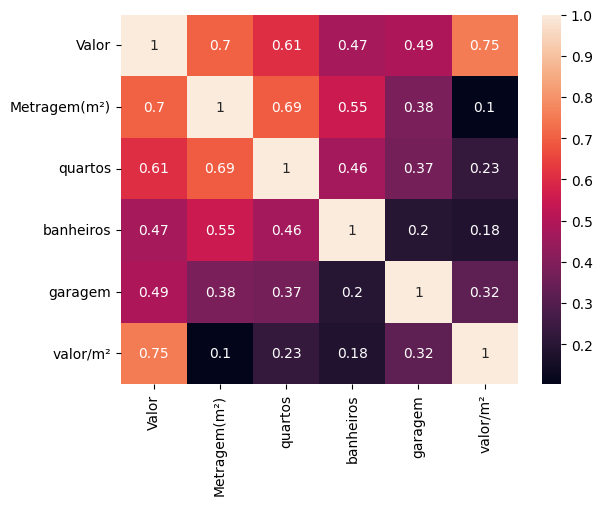

In [ ]:
corr_ = df1.drop(['Endereço'], axis = 1)

sns.heatmap(corr_.corr(), annot = True)